<a href="https://colab.research.google.com/github/2303A51226/AIML-2303A51226/blob/main/Lab_mock_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



In [ ]:
def load_data(file_path):
    chunks = []
    for chunk in pd.read_csv(file_path, sep=';', parse_dates={'datetime': ['Date', 'Time']},
                            dayfirst=True, chunksize=100000):
        # Convert power readings to numeric
        numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                         'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
        for col in numeric_columns:
            chunk[col] = pd.to_numeric(chunk[col].replace('?', np.nan))
        chunks.append(chunk)

    df = pd.concat(chunks, ignore_index=True)

    # Add time-based features
    df['hour'] = df['datetime'].dt.hour
    df['day'] = df['datetime'].dt.day
    df['month'] = df['datetime'].dt.month
    df['year'] = df['datetime'].dt.year
    df['dayofweek'] = df['datetime'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

    return df

In [ ]:
def analyze_hourly_patterns(df):
    hourly_avg = df.groupby('hour')['Global_active_power'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(hourly_avg.index, hourly_avg.values)
    plt.title('Average Power Consumption by Hour')
    plt.xlabel('Hour of Day')
    plt.ylabel('Global Active Power (kW)')
    plt.grid(True)
    plt.show()
    return hourly_avg

In [ ]:
def analyze_weekday_weekend(df):
    weekday_pattern = df[df['is_weekend'] == 0].groupby('hour')['Global_active_power'].mean()
    weekend_pattern = df[df['is_weekend'] == 1].groupby('hour')['Global_active_power'].mean()

    plt.figure(figsize=(10, 6))
    plt.plot(weekday_pattern.index, weekday_pattern.values, label='Weekday')
    plt.plot(weekend_pattern.index, weekend_pattern.values, label='Weekend')
    plt.title('Average Power Consumption: Weekday vs Weekend')
    plt.xlabel('Hour of Day')
    plt.ylabel('Global Active Power (kW)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def analyze_monthly_patterns(df):
    monthly_avg = df.groupby(['year', 'month'])['Global_active_power'].mean().reset_index()
    monthly_avg['date'] = pd.to_datetime(monthly_avg[['year', 'month']].assign(day=1))

    plt.figure(figsize=(12, 6))
    plt.plot(monthly_avg['date'], monthly_avg['Global_active_power'])
    plt.title('Monthly Average Power Consumption')
    plt.xlabel('Date')
    plt.ylabel('Global Active Power (kW)')
    plt.grid(True)
    plt.show()

In [ ]:
def perform_clustering(df, sample_size=10000):
    # Sample data to prevent memory issues
    df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

    # Prepare features
    features = ['Global_active_power', 'Global_reactive_power']
    X = df_sample[features].dropna()

    # Standardize
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # K-means clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    labels = kmeans.fit_predict(X_scaled)

    # Visualize
    plt.figure(figsize=(10, 6))
    plt.scatter(X['Global_active_power'], X['Global_reactive_power'],
               c=labels, cmap='viridis', alpha=0.5)
    plt.title('Power Consumption Clusters')
    plt.xlabel('Global Active Power')
    plt.ylabel('Global Reactive Power')
    plt.colorbar(label='Cluster')
    plt.show()

    return kmeans

Data loaded successfully!
Number of records: 2075259

First few rows:
             datetime  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  \
0              18.4             0.0             1.0            17.0    17   
1              23.0             0.0             1.0            16.0    17   
2              23.0             0.0             2.0            17.0    17   
3              23.0             0.0             1.0            17.0    17   
4              15.8             0.0             1.0            17.0    17   

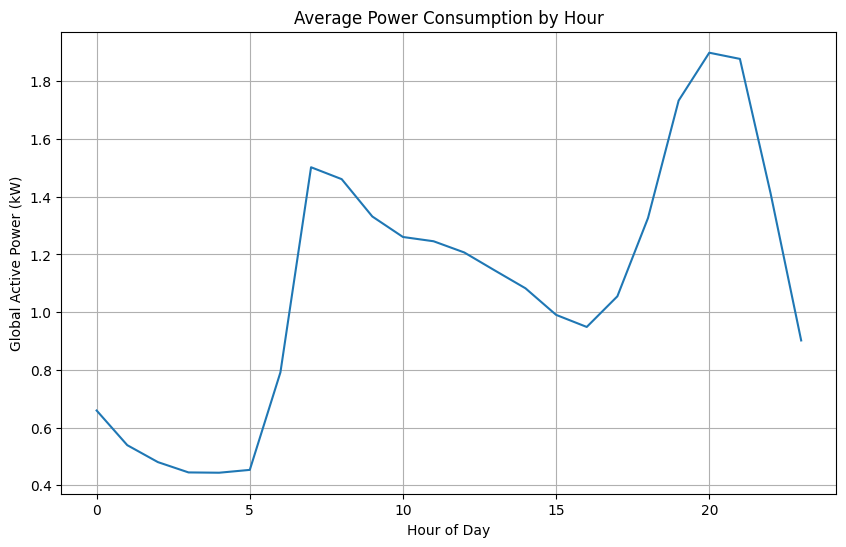

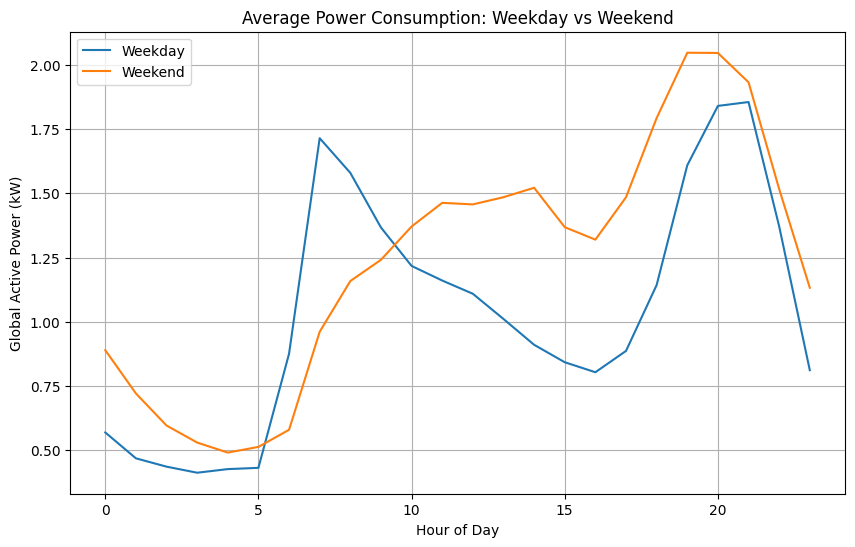

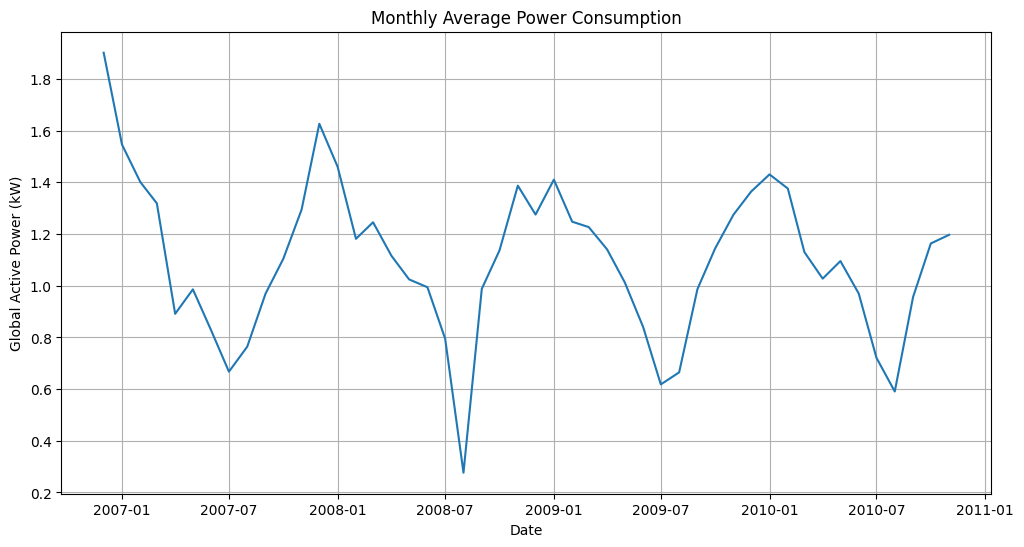

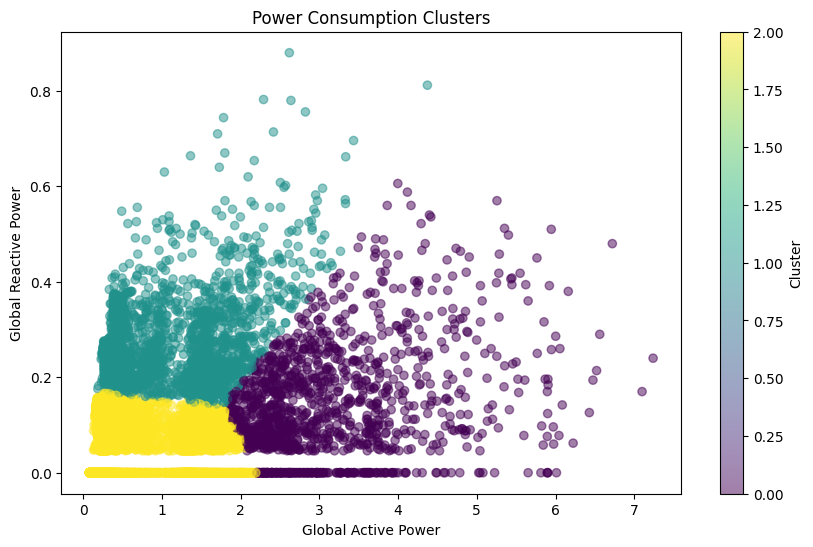

In [ ]:
# Cell 1: Load Data
df = load_data('data.txt')
print("Data loaded successfully!")
print(f"Number of records: {len(df)}")
print("\nFirst few rows:")
print(df.head())

# Cell 2: Hourly Analysis
hourly_patterns = analyze_hourly_patterns(df)

# Cell 3: Weekday vs Weekend
analyze_weekday_weekend(df)

# Cell 4: Monthly Patterns
analyze_monthly_patterns(df)

# Cell 5: Clustering
kmeans_model = perform_clustering(df)